<a href="https://colab.research.google.com/github/neSTORY/practice/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
tf.enable_eager_execution()

In [6]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypothesis = W * x + b
hypothesis = W * x_data + b

In [7]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [9]:
# tf.reduce_mean()
# -> 평균을 구해주는 함수. + 차원을 하나 줄여줌
v = [1.,2.,3.,4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [ ]:
# tf.square()
# -> 제곱을 구해주는 함수
tf.square(3) # 9

In [17]:
# learning rate initialize
learning_rate = 0.01

# Gradient descent
# 변수들의 변화를 tf.GradientTape() 구문안에 넣어주고 이를 tape이라고 기록.
with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad , b_grad = tape.gradient(cost, [W,b]) # tape의 gradient함수를 통해 미분값을 구해줌
# W_grad : W의 미분값, b_grad : b의 미분값

# A.assign_sub(B)
# A = A - B
# => A -= B

W.assign_sub(learning_rate*W_grad)
b.assign_sub(learning_rate*b_grad)

In [22]:
# Data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# W,b initialize
W = tf.Variable(-2.9)
b = tf.Variable(0.5)

learning_rate = 1e-2

for i in range(100+1): # W, b updatae
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  W_grad, b_grad = tape.gradient(cost, [W,b])
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i%10 == 0:
    print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(),cost))

    0|    -2.072|     0.724|155.860016
   10|    0.4291|     1.364|  1.068594
   20|    0.6093|     1.364|  0.345560
   30|    0.6332|     1.321|  0.319980
   40|    0.6461|     1.277|  0.299011
   50|     0.658|     1.235|  0.279428
   60|    0.6694|     1.194|  0.261128
   70|    0.6804|     1.154|  0.244027
   80|     0.691|     1.116|  0.228045
   90|    0.7013|     1.078|  0.213110
  100|    0.7113|     1.042|  0.199154


In [16]:
# 새로운 값으로 예측
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.000317, shape=(), dtype=float32)
tf.Tensor(2.4997468, shape=(), dtype=float32)


### b가 생략된 가설함수
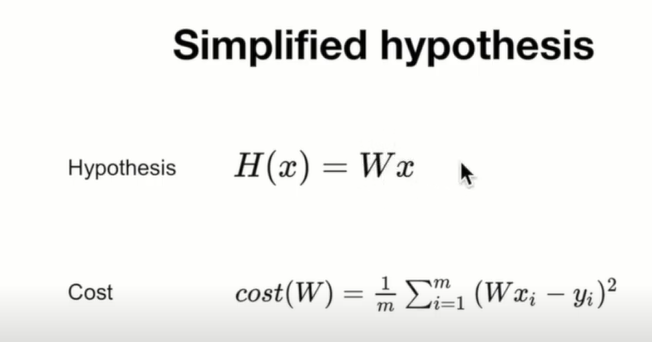

### Gradient descent algorithm
- Minimize cost function
- Gradient descent is used many minimization problems
- For a given cost function, cost(W,b), it will find W, b to minimize cost
- It can be applied to more general function: cost(w1, w2, ...)

### How it works?
- 초기값에서 시작
  - start at  0,0(or any other value)
  - keeping changing W and b a little bit to try and reduce cost(W,b)
- Each time you change the parameters, you select the gradient which reduces cost(W,b) the most possible
- Repeat
- Do so unitl you converge to a local minimum
- Has an interesting property
  - Where you start can determine which minimum you end up

### Gradient descent 과정
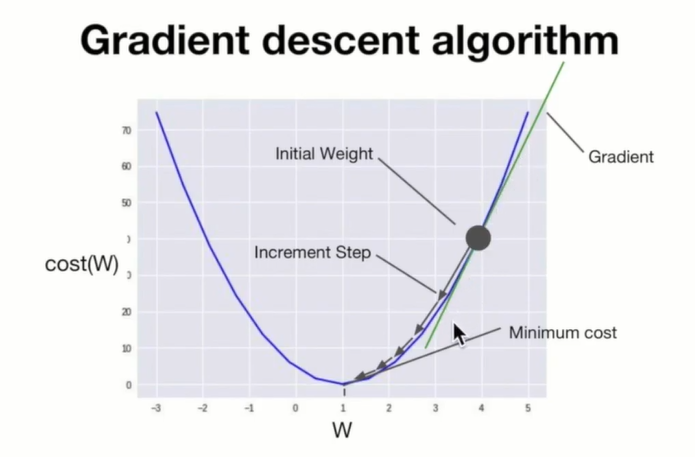

시작점이 어디에 있든 기울기가 최소인 지점으로 회귀하려는 성질이 있다. <br>또한 기울기가 가파를 수록 변화값이 크다.

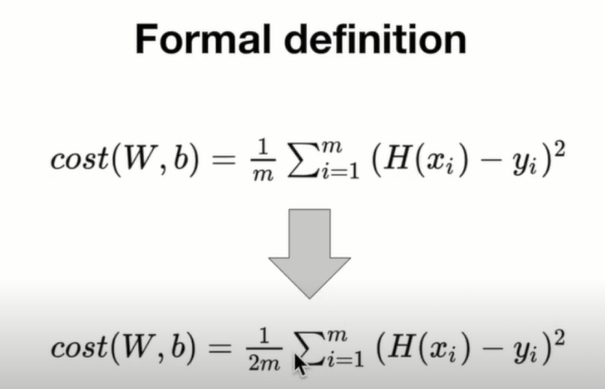

2m으로 나누는 이유?<br>
-> cost함수를 미분할 경우 제곱에 있는 지수 2가 앞으로 나와서 1/m으로 됨

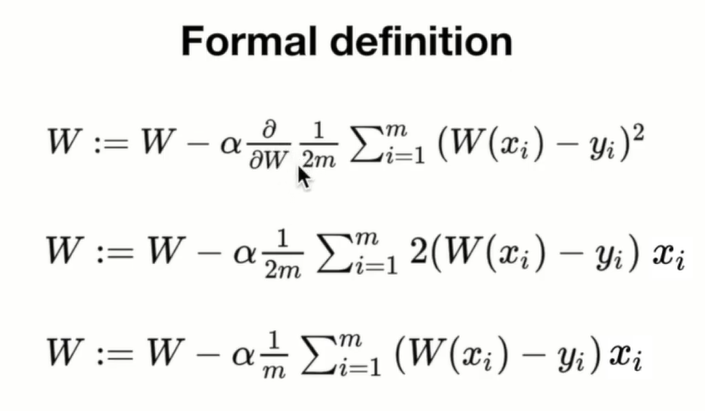

알파는 learning rate이고 a는 편미분 기호로 aW는 W만 미분을 하겠다는 뜻.<br> 즉 다른 변수들은 상수 취급하고 W만 미분을 진행

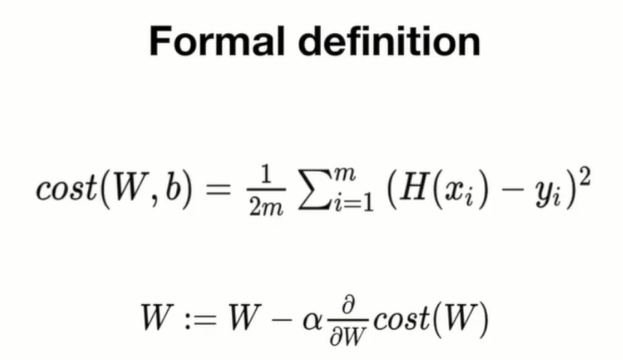

최종 W 업데이트 식
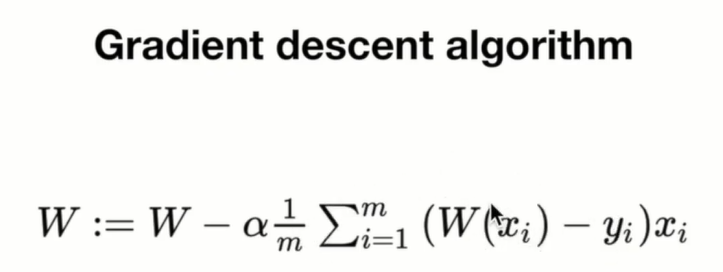

In [32]:
# Gradient Descent to Code

tf.set_random_seed(0) # seed 값 통일

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random_normal([1], -100., 100.))
# tf.random_normal : 정규 분포를 따르는 랜덤한 수를 리턴해줌.
# (개수, 범위1, 범위2)

for step in range(300):
  hypothesis = W * x_data
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  alpha = 0.01 # learning rate
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,x_data)-y_data, x_data))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print("{:5} | {:10.4f} | {:10.6f}".format(
        step, cost.numpy(), W.numpy()[0]
    ))

    0 | 18332.2188 |  47.398293
   10 |  3855.3564 |  22.638384
   20 |   810.9046 |  11.283927
   30 |   170.6631 |   6.076973
   40 |    36.0217 |   3.689155
   50 |     7.7069 |   2.594144
   60 |     1.7524 |   2.091991
   70 |     0.5001 |   1.861713
   80 |     0.2368 |   1.756112
   90 |     0.1814 |   1.707684
  100 |     0.1698 |   1.685477
  110 |     0.1673 |   1.675292
  120 |     0.1668 |   1.670622
  130 |     0.1667 |   1.668481
  140 |     0.1667 |   1.667498
  150 |     0.1667 |   1.667048
  160 |     0.1667 |   1.666842
  170 |     0.1667 |   1.666747
  180 |     0.1667 |   1.666703
  190 |     0.1667 |   1.666684
  200 |     0.1667 |   1.666674
  210 |     0.1667 |   1.666670
  220 |     0.1667 |   1.666668
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667


### Remind

- Hypothesis : 가설. yhat으로 우리가 예측하려는 값의 식
- Cost function : 실제값 y와 Hypothesis를 통해 구한 yhat의 차이
- Gradient descent : cost값을 최소화 시키기 위하여 cost값을 미분하여 cost식의 변수를 업데이트 해가는 과정



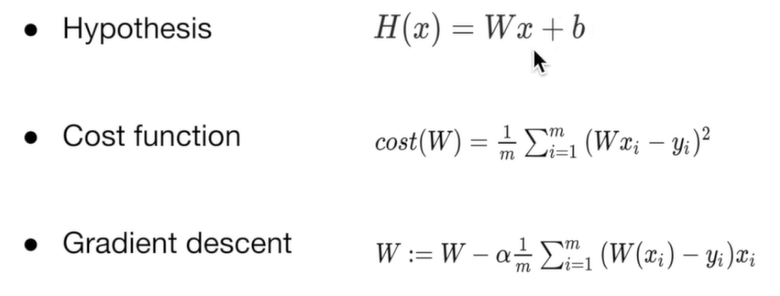

### 변수가 여러개인 회귀 식
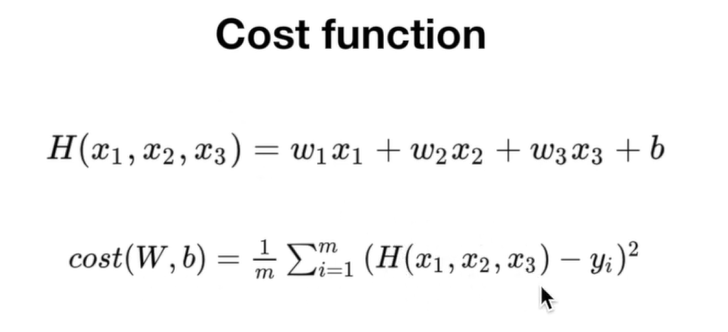

변수가 여러개인 경우 weight값도 여러개가 생긴다.<br> 그러고 일일이 변수를 써주기 불편하기 때문에 weight값 W를 matrix로 표현한다.

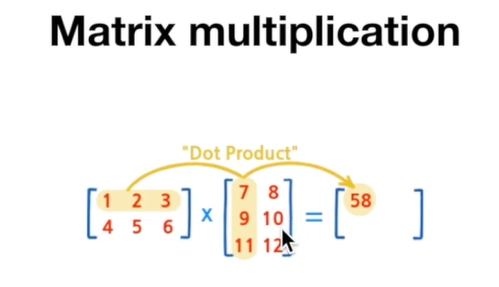

행렬의 곱샘을 이용하여 weight값과 변수들을 행렬화하여 간단하게 식을 정리할 수 있다.

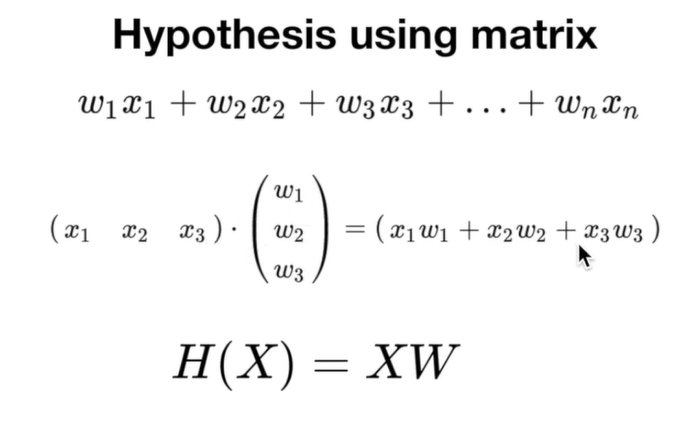

w*x를 행렬로 표현하기 위해 H(x) = XW로 표현됐다.<br> -> X : (1,3) x W : (3,1) -> output : (1,1) 

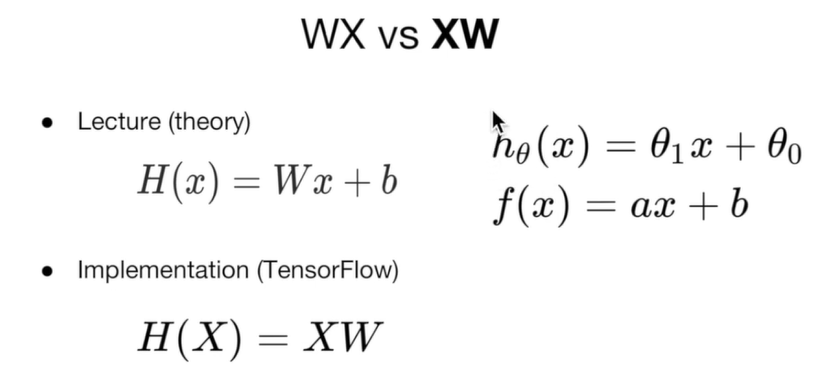

이론적으로 설명할 때 Wx + b로 표현하지만 tensorflow에서는 행렬의 곱으로 표현하기 위해 XW로 표현한다.(행렬의 shape때문!)

또 다른 이론 설명에서는 weight를 세타로 표현하거나 ax+b의 형태로 표현하기도 한다.

In [36]:
# 다변수 선형회귀 코드

# data and label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
Y = [152., 185., 180., 196., 142.]

# random weights
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

learning_rate = 1e-6

for i in range(1000+1):
  # tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1*x1 + w2*x2 + w3*x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

  # calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1,w2,w3,b])

  # update w1, w2, w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i%50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   46561.6680
   50 |     518.1807
  100 |       7.2794
  150 |       1.6092
  200 |       1.5452
  250 |       1.5433
  300 |       1.5421
  350 |       1.5410
  400 |       1.5398
  450 |       1.5387
  500 |       1.5376
  550 |       1.5364
  600 |       1.5353
  650 |       1.5341
  700 |       1.5330
  750 |       1.5319
  800 |       1.5308
  850 |       1.5297
  900 |       1.5286
  950 |       1.5274
 1000 |       1.5263


In [38]:
import numpy as np

In [45]:
# matrix로 표현한 코드

data = np.array([
                 # x1,  x2, x3, y
                 [73., 80., 75., 152.],
                 [93., 88., 93., 185.],
                 [89., 91., 90., 180.],
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142.]
])

# slice data
X = data[:, :-1]
y = data[:, [-1]]

In [48]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.]])

In [49]:
# 위의 data에 맞는 W,b를 matrix형태로 표현
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

# hypothesis, prediction function
def predict(X):
  return tf.matmul(X,W) + b

In [66]:
X = X.astype("float32")

In [67]:
X.shape, W.shape

((5, 3), TensorShape([Dimension(3), Dimension(1)]))

In [68]:
predict(X).shape

TensorShape([Dimension(1), Dimension(5), Dimension(1)])

In [73]:
# full code

data = np.array([
                 # x1,  x2, x3, y
                 [73., 80., 75., 152.],
                 [93., 88., 93., 185.],
                 [89., 91., 90., 180.],
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142.]
])

# slice data
X = data[:, :-1]
y = data[:, [-1]]
X = X.astype("float32") # float64 -> float 32
# print(X.shape)

# 위의 data에 맞는 W,b를 matrix형태로 표현
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# print(W.shape)

# hypothesis, prediction function
def predict(X):
  return tf.matmul(X,W) + b

n_epochs = 2000
for i in range(n_epochs+1):
  # record the gradient of the cost function
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X)-y)))
  
  # calculate the gradients of the loss
  W_grad, b_grad = tape.gradient(cost, [W,b])

  # update parameters (W and b)
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

    0 | 69984.4219
  100 |    13.7613
  200 |     5.1196
  300 |     5.0919
  400 |     5.0655
  500 |     5.0392
  600 |     5.0131
  700 |     4.9871
  800 |     4.9612
  900 |     4.9355
 1000 |     4.9099
 1100 |     4.8844
 1200 |     4.8591
 1300 |     4.8339
 1400 |     4.8089
 1500 |     4.7840
 1600 |     4.7592
 1700 |     4.7346
 1800 |     4.7101
 1900 |     4.6857
 2000 |     4.6615


weight의 개수가 많아지면 일일이 쓰기 힘들기 때문에 행렬형태로 weight를 표현하는게 편함!